In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [6]:
import os
import glob

#path = './tripdata/'
extension = 'csv'
#os.chdir(path)
csv_list = glob.glob('*.{}'.format(extension))
print(csv_list)

['yr_2020.csv', 'yr_2018.csv', 'yr_2019.csv', 'yr_2014.csv', 'yr_2015.csv', 'yr_2017.csv', 'yr_2016.csv', 'yr_2013.csv']


In [8]:
df_list = []

for csv_file in csv_list:
    df_temp = pd.read_csv(csv_file,\
                  dtype={"tripduration":float,\
                  "starttime":object,\
                  "stoptime":object,\
                  "start_station_id":float,\
                  "start_station_name":object,\
                  "start_station_latitude":float,\
                  "start_station_longitude":float,\
                  "end_station_id":float,\
                  "end_station_name":object,\
                  "end_station_latitude":float,\
                  "end_station_longitude":float,\
                  "bikeid":int,\
                  "usertype":object,\
                  "birth_year":object,\
                  "gender":int,\
                  "counter":int,\
                  "year":int,\
                  "age":int})
    
    df_list.append(df_temp)

df_all = pd.concat(df_list)

In [9]:
#check for missing values 
df_all.isnull().sum()

#areas of missing information: 
#missing start station information 
#missing end station information
#missing birth_year - mean imputation? 

#after remoinv gmissing end long and lat 
#number of missing end equals missing start - missing trip information entirely, best to remove these

tripduration                    0
starttime                       0
stoptime                        0
start_station_id              133
start_station_name            133
start_station_latitude          0
start_station_longitude         0
end_station_id               1027
end_station_name             1027
end_station_latitude          894
end_station_longitude         894
bikeid                          0
usertype                     2705
birth_year                 251569
gender                          0
counter                         0
year                            0
age                             0
dtype: int64

In [10]:
len(df_all['birth_year'].drop_duplicates())

115

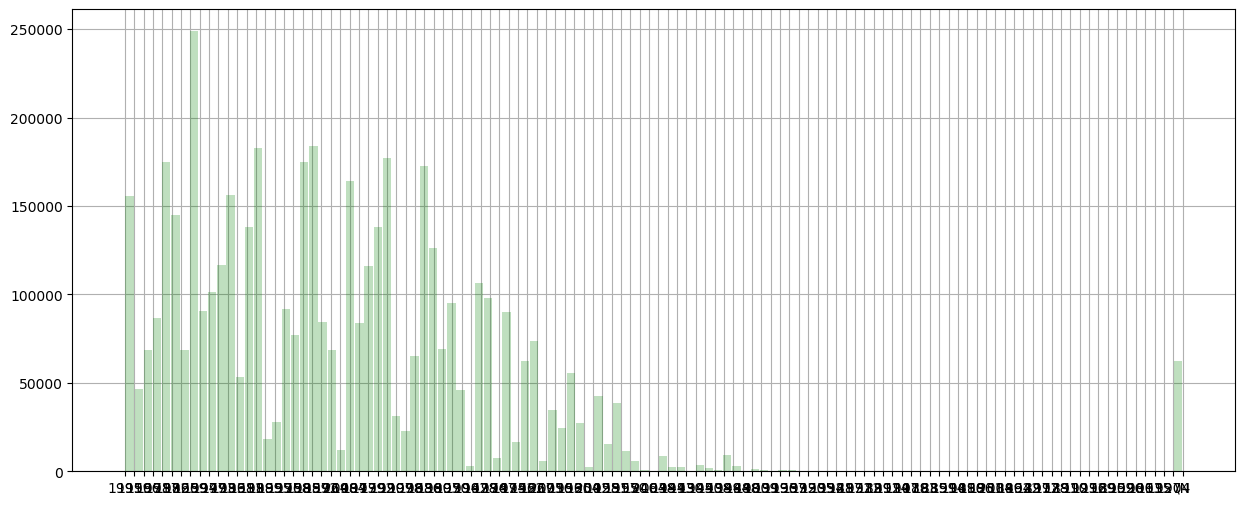

In [11]:
#looking at missing birth year
df_all['birth_year'].hist(bins=len(df_all['birth_year'].drop_duplicates()), figsize=(15,6),\
                          color='green', alpha = 0.25, zorder=2, rwidth=0.9)



In [108]:
df_all[df_all['birth_year'].isnull()==True].head(5)
#age is set to year ?

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,counter,year,age,Unnamed: 0,start_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410,NaN,NaN,0.0,2013-06-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732,NaN,NaN,1.0,2013-06-02
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,NaN,NaN,2.0,2013-06-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739,NaN,NaN,3.0,2013-06-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729,NaN,NaN,4.0,2013-06-05


<BarContainer object of 2 artists>

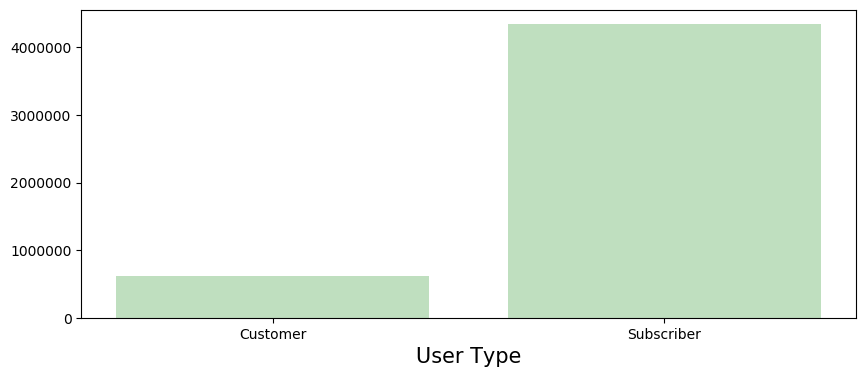

In [110]:
#looking at missing user type
subdata = df_all[['usertype','counter']]
plotdata=subdata.groupby(['usertype']).sum()
plotdata=plotdata.reset_index()

plt.figure(figsize=(10,4))
plt.xlabel('User Type', size=15)
plt.bar(plotdata['usertype'],plotdata['counter'], alpha = 0.25,color='g')

In [111]:
#missing user type tends to be associated with missing gender 
df_all[df_all['usertype'].isnull()==True]['gender'].drop_duplicates()

0       NaN
69      2.0
83      1.0
8414    0.0
Name: gender, dtype: float64

<BarContainer object of 3 artists>

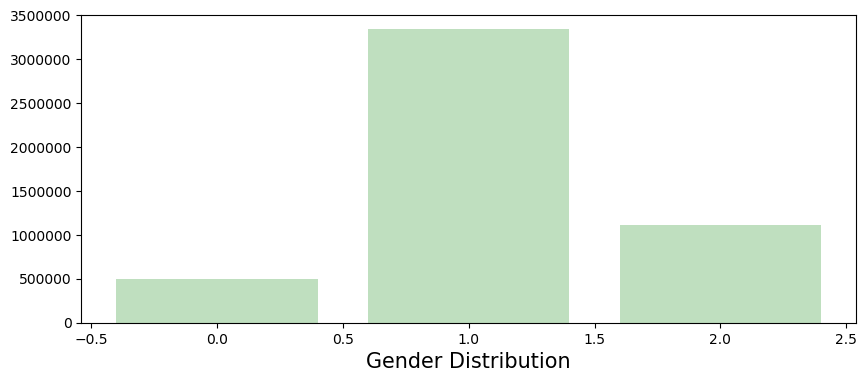

In [112]:
#gender distribution
subdata = df_all[['gender','counter']]
plotdata=subdata.groupby(['gender']).sum()
plotdata=plotdata.reset_index()

plt.figure(figsize=(10,4))
plt.xlabel('Gender Distribution', size=15)
plt.bar(plotdata['gender'],plotdata['counter'], alpha = 0.25,color='g')

In [12]:
def newfeatures(data_frame):
    
    #converting time to date time for pandas
    data_frame['start_time'] = pd.to_datetime(data_frame['starttime'])
    data_frame['stop_time'] = pd.to_datetime( data_frame['stoptime'])

    #start time variables 
    data_frame['year'] = data_frame['start_time'].dt.year
    
    #defining months
    data_frame['month'] = data_frame['start_time'].dt.month
    data_frame.loc[data_frame['month'] == 1, ['month']] = '1January'
    data_frame.loc[data_frame['month'] == 2, ['month']] = '2February'
    data_frame.loc[data_frame['month'] == 3, ['month']] = '3March'
    data_frame.loc[data_frame['month'] == 4, ['month']] = '4April'
    data_frame.loc[data_frame['month'] == 5, ['month']] = '5May'
    data_frame.loc[data_frame['month'] == 6, ['month']] = '6June'
    data_frame.loc[data_frame['month'] == 7, ['month']] = '7July'
    data_frame.loc[data_frame['month'] == 8, ['month']] = '8August'
    data_frame.loc[data_frame['month'] == 9, ['month']] = '9September'
    data_frame.loc[data_frame['month'] == 10, ['month']] = '9z0October'
    data_frame.loc[data_frame['month'] == 11, ['month']] = '9z1November'
    data_frame.loc[data_frame['month'] == 12, ['month']] = '9z2December'
    
    
    data_frame['start_date'] = data_frame['start_time'].dt.date
    data_frame['time_of_day'] = data_frame['start_time'].dt.time
    data_frame['hour_of_day'] = data_frame['start_time'].dt.hour #0 to 23 
    
    #defining days of the week and weekend 
    data_frame['week_day'] = data_frame['start_time'].dt.weekday #0 to 7 
    data_frame['weekend'] = [1 if 5<=x<=6 else 0 for x in data_frame['week_day']]
    data_frame.loc[data_frame['week_day'] == 0, ['week_day']] = '1Monday'
    data_frame.loc[data_frame['week_day'] == 1, ['week_day']] = '2Tuesday'
    data_frame.loc[data_frame['week_day'] == 2, ['week_day']] = '3Wednesday'
    data_frame.loc[data_frame['week_day'] == 3, ['week_day']] = '4Thursday'
    data_frame.loc[data_frame['week_day'] == 4, ['week_day']] = '5Friday'
    data_frame.loc[data_frame['week_day'] == 5, ['week_day']] = '6Saturday'
    data_frame.loc[data_frame['week_day'] == 6, ['week_day']] = '7Sunday'

    
    #stop time variables 
    data_frame['stop_date'] = data_frame['stop_time'].dt.date
    data_frame['stop_hour'] = data_frame['stop_time'].dt.hour
    data_frame['end_time_of_day'] = data_frame['stop_time'].dt.time

    return data_frame

In [13]:
df_use=newfeatures(df_all)
df_use.head(2)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,stop_time,month,start_date,time_of_day,hour_of_day,week_day,weekend,stop_date,stop_hour,end_time_of_day
0,114.0,2020-01-01 00:03:49.8380,2020-01-01 00:05:44.1390,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,416.0,Cumberland St & Lafayette Ave,40.687534,...,2020-01-01 00:05:44.139,1January,2020-01-01,00:03:49.838000,0,3Wednesday,0,2020-01-01,0,00:05:44.139000
1,292.0,2020-01-01 00:11:00.4800,2020-01-01 00:15:53.0220,517.0,Pershing Square South,40.751581,-73.977910,472.0,E 32 St & Park Ave,40.745712,...,2020-01-01 00:15:53.022,1January,2020-01-01,00:11:00.480000,0,3Wednesday,0,2020-01-01,0,00:15:53.022000


In [14]:
df_use['counter']=1

In [15]:
df_month_year = df_use[['year','month','counter']].groupby(['year','month']).sum().reset_index()

In [16]:
df_month_year.sort_values(by=['year','month']).iloc[7:]

,year,month,counter
7,2014,1January,14894
8,2014,2February,11228
9,2014,3March,21629
10,2014,4April,33532
11,2014,5May,43360
...,...,...,...
79,2020,1January,63877
80,2020,2February,58785
81,2020,3March,54390
82,2020,4April,34364


In [17]:
pivot_df = df_month_year[df_month_year['year']<=2019].iloc[7:].\
sort_values(by=['year','month']).pivot(index='month', columns='year', values='counter')
pivot_df.head(2)

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1January,14894,14191,26027,36711,36793,49114
2February,11228,9869,28491,40173,43026,48263


<Figure size 1000x700 with 0 Axes>

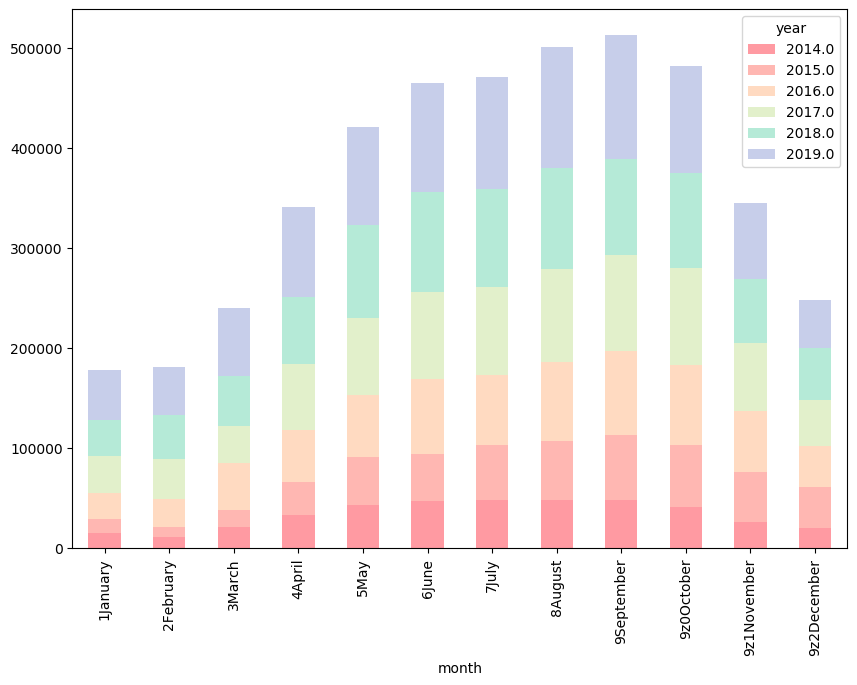

In [32]:
colors = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
fig = plt.figure(figsize=(10,7))
labels = ['January', 'February', 'March', 'April','May','June','July','August','September',\
         'October','November','December']

#fig.set_xticklabels(labels, fontsize=30)
pivot_df.loc[:,].plot.bar(stacked=True, color=colors, figsize=(10,7),tick_label=labels)

In [52]:
pivot_df.head(2)

usertype,Customer,Subscriber
month,,
6June,12139,16813
7July,8851,32960


<Figure size 1000x700 with 0 Axes>

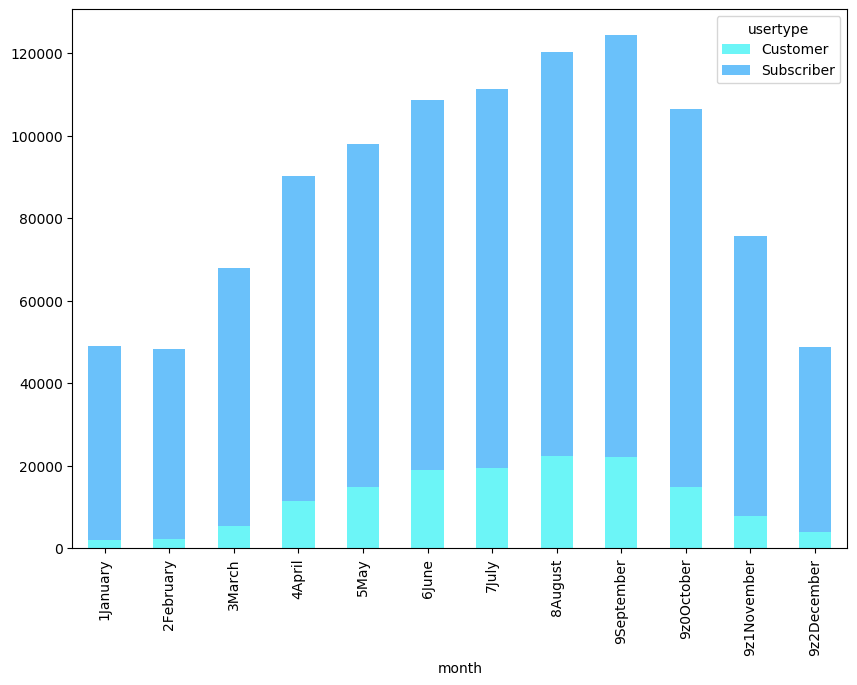

In [65]:
df_month_usertype = df_use[['year','month','usertype','counter']].groupby(['year','month','usertype']).sum().reset_index()
pivot_df = df_month_usertype[df_month_usertype['year']==2019].\
sort_values(by=['month','usertype']).pivot(index='month', columns='usertype', values='counter')
pivot_df.head(2)

fig = plt.figure(figsize=(10,7))
colors = ["#0BEFF3", "#0799F8"]
#fig.set_xticklabels(labels, fontsize=30)
pivot_df.loc[:,].plot.bar(stacked=True, color=colors, figsize=(10,7),alpha=0.6)

<BarContainer object of 8 artists>

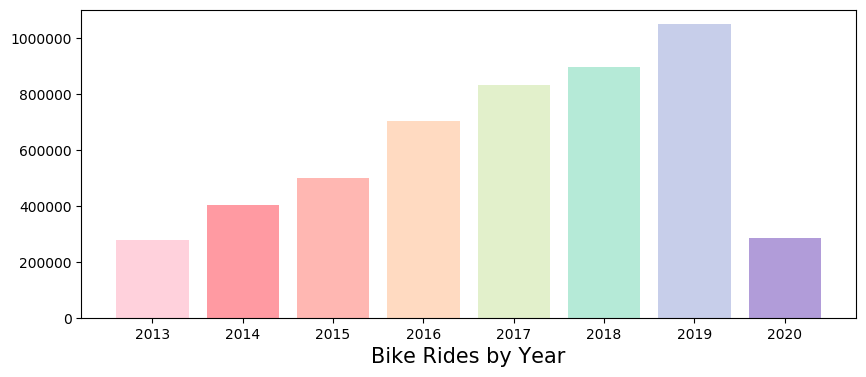

In [122]:
colors = ['#FFD1DC',"#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA','#B19CD9']
df_year = df_use[['year','counter']].groupby('year').sum().reset_index()
df_year
plt.figure(figsize=(10,4))
plt.xlabel('Bike Rides by Year', size=15)
plt.bar(df_year['year'],df_year['counter'],color=colors)

In [123]:
df_days = df_use[df_use['year']==2019][['week_day','counter']].groupby('week_day').sum().reset_index()

<BarContainer object of 7 artists>

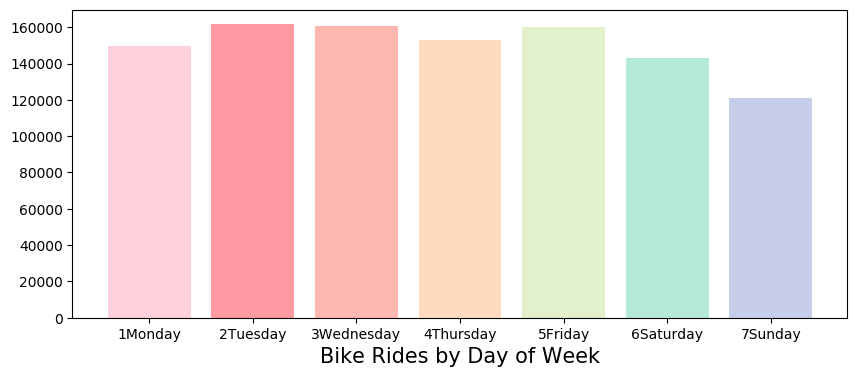

In [124]:
plt.figure(figsize=(10,4))
plt.xlabel('Bike Rides by Day of Week', size=15)
plt.bar(df_days['week_day'],df_days['counter'],color=colors)

<BarContainer object of 24 artists>

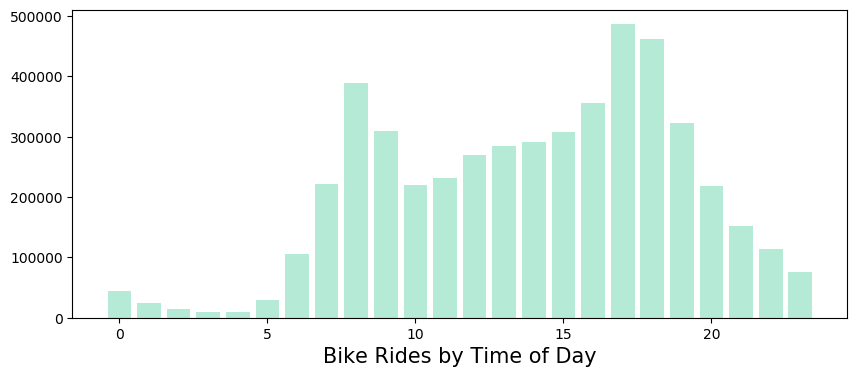

In [125]:
colors = ['#FFD1DC',"#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA','#B19CD9']
df_year = df_use[['hour_of_day','counter']].groupby('hour_of_day').sum().reset_index()
df_year
plt.figure(figsize=(10,4))
plt.xlabel('Bike Rides by Time of Day', size=15)
plt.bar(df_year['hour_of_day'],df_year['counter'],color='#B5EAD7')

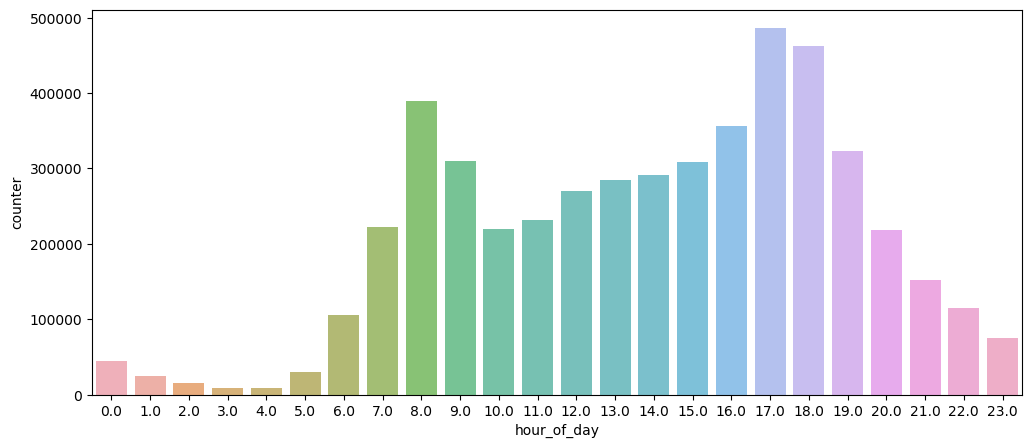

In [126]:
import seaborn as sns

df_year = df_use[['hour_of_day','counter']].groupby('hour_of_day').sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot('hour_of_day','counter', data = df_year,alpha=.75);


<BarContainer object of 216 artists>

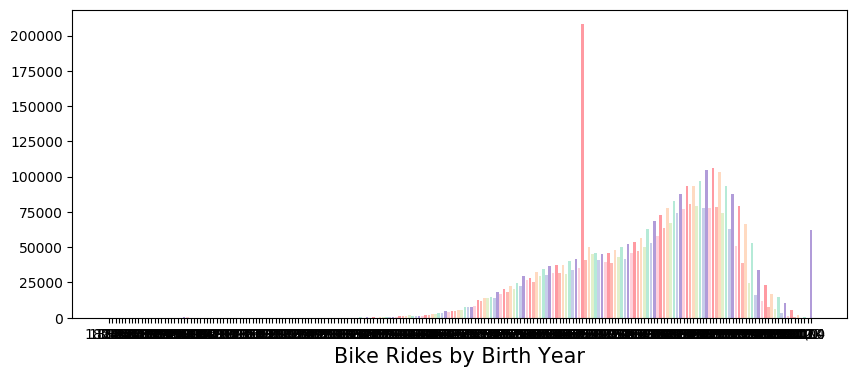

In [78]:
#bin age increments of 10 
#drop birth year
#assume user type customer for missing 
colors = ['#FFD1DC',"#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA','#B19CD9']
df_age = df_use[['birth_year','counter']].groupby('birth_year').sum().reset_index()
df_age
plt.figure(figsize=(10,4))
plt.xlabel('Bike Rides by Birth Year', size=15)
plt.bar(df_age['birth_year'],df_age['counter'],color=colors)


In [133]:
df_heat = df_use[['year','week_day','hour_of_day','counter']].groupby(['year','week_day','hour_of_day']).sum().reset_index()

In [134]:
df_heat.to_csv('heat.csv')

In [130]:
# pandas pivot
heatmap_data = pd.pivot_table(df_heat, values='counter', 
                     index=['week_day'], 
                     columns='hour_of_day')

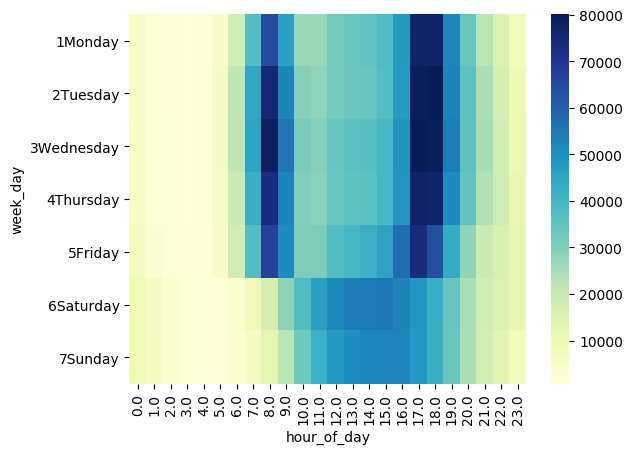

In [132]:
sns.heatmap(heatmap_data, cmap="YlGnBu")

In [75]:
df_count_stations = df_use[['year','start_station_name']].groupby(['year','start_station_name']).sum().reset_index()
df_count_stations['count'] = np.ones(len(df_count_stations))
df_count_stations.groupby('year').sum().reset_index()

,year,count
0,2013.0,366.0
1,2014.0,344.0
2,2015.0,529.0
3,2016.0,698.0
4,2017.0,861.0
5,2018.0,872.0
6,2019.0,982.0
7,2020.0,994.0


In [95]:
df_use[['year','counter']].groupby('year').sum().reset_index()

,year,counter
0,2013.0,279733
1,2014.0,404148
2,2015.0,500429
3,2016.0,704881
4,2017.0,831541
5,2018.0,896908
6,2019.0,1049108
7,2020.0,286682


In [100]:
###hourly monthly view

df_month_day_hour = df_use[df_use['year']==2019][['month','week_day','hour_of_day','start_station_name',\
                             'start_station_latitude','start_station_longitude','counter']].\
groupby(['month','week_day','hour_of_day','start_station_name',\
                             'start_station_latitude','start_station_longitude']).sum().reset_index()

In [101]:
df_month_day_hour.to_csv('df_month_day_hour.csv')